In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
data = pd.read_csv("application_train.csv")

まずはデータを把握する。一例として、ファイルの容量、カラム数、レコード数（行数）を確認するために、info()を使ってみましょう。

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


info()は各カラムのデータ型の内訳も表示してくれるので便利です。

では、実際にどのようにデータが格納されているのかhead()を使って確認しましょう。

In [7]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Nan（欠損値）が含まれるカラムが存在することが確認できます。EDAは特に順序が決まっているわけではありません。

ひとまず欠損値については言及せず、仮説ベースでデータの理解を深めていこうと思います。

#### 注意

**本来は何か検証したい目的（そもそもの分析の目的）があり、そのための仮説という位置付けだが、ここでは分析練習のため仮説の根拠（なぜその仮説を立てるか
）については論じない。**

## 仮説１
年収が高い人の方が返済してそう。
この仮説を検証するために、返済している人と返済してない人で年収分布をみてみる。

**さらに深い仮説(上手い仮説)を立てるためのコツ**  
仮説をたてた後に、「なぜその仮説が立てられるのか」を考える。「なぜそう仮説をおくのか」と深掘りすると仮説の質が上がる。

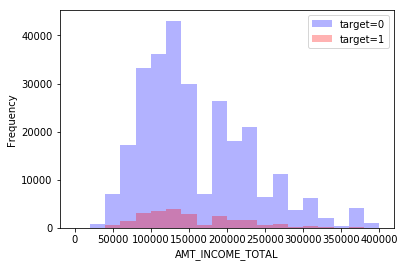

In [11]:
data["AMT_INCOME_TOTAL"][data["TARGET"]==0].plot.hist(bins=20, alpha = 0.3, color="b", range=(0,400000), label="target=0")
data["AMT_INCOME_TOTAL"][data["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r", range=(0,400000), label="target=1")
plt.xlabel("AMT_INCOME_TOTAL")
plt.legend()

#### メソッドの略説

- hist()：ヒストグラムを描画する
- bins：ビンの数を指定する
- alpha：ヒストグラムを（半）透明にしたい時に使用。
- range：x軸の数値の範囲を指定

赤いヒストグラムと青いヒストグラムのビンの高さが大きく異なる。これはターゲットラベルのデータ数が0と1で大きく異なることを意味している。ターゲットラベルのデータの不均衡さをなくすために、赤、青のヒストグラムごとに正規化（※）する。

※ここでいう正規化とは、データ数に依存しないように各ビンをターゲットラベルのデータ数で割ることを意味しています。

#### ヒストグラムの正規化の方法
hist()の引数でnormed=Trueにするだけです。

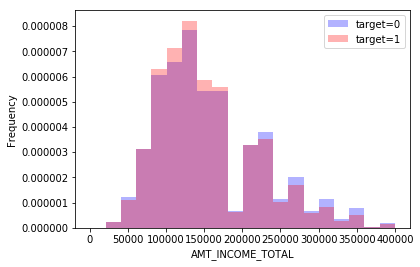

In [12]:
data["AMT_INCOME_TOTAL"][data["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="b" , normed=True, range=(1000,400000), label="target=0")
data["AMT_INCOME_TOTAL"][data["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r", normed=True, range=(1000,400000), label="target=1")
plt.xlabel("AMT_INCOME_TOTAL")
plt.legend()

ターゲットラベルの不均衡さをなくすため正規化してみたが、分布はほとんど同じになった。
ヒストグラムの形状が同じなのは、ビン幅が影響しているかもしれないので、ビン幅を変えていくつか試してみる。

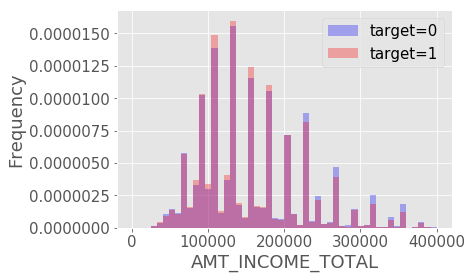

In [16]:
data["AMT_INCOME_TOTAL"][data["TARGET"]==0].plot.hist(bins=50, alpha=0.3, color="b", normed=True, range=(1000,400000), label="target=0")
data["AMT_INCOME_TOTAL"][data["TARGET"]==1].plot.hist(bins=50, alpha=0.3, color="r", normed=True, range=(1000,400000), label="target=1")
plt.xlabel("AMT_INCOME_TOTAL")
plt.legend()

それほど変わらず。以上の結果から年収と返済能力の（0,1）にはそれほど相関がないと考える。
ヒストグラムのビン幅は今回は決め打ち。スコットの公式を用いてビン幅を理論的に決めることも可能。Rではスコットの公式により
ビン幅を決めるためのパッケージが用意されている。


ヒストグラムで可視化することでターゲットラベルが不均衡であることが確認できた。不均衡具合（ターゲットラベルの比率）を確認するために、円グラフで描画する。

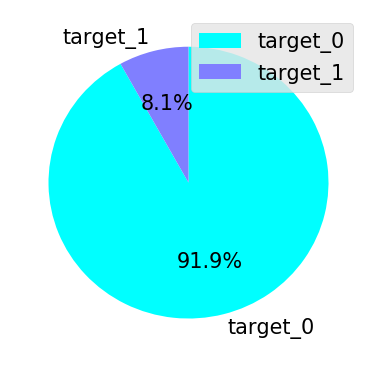

In [21]:
data_target = data["TARGET"].value_counts().values
label = ["target_0", "target_1"]
###綺麗に書くためのおまじない
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
###各種パラメータ
size=(5,4.5)
col=cm.cool(np.arange(len(data))/float(len(data_target)))
###pie
plt.figure(figsize=size,dpi=100)
plt.subplots_adjust(left=0,right=0.7)
plt.pie(data_target,colors=col,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',
       labels=label)
plt.legend()
plt.show()

かなり不均衡(11:1程度)であることが確認できる。　　

なぜこれほどターゲットラベルが不均衡なのかを考察するためには、そもそもこの目的変数（ターゲットラベル）がどのような定義に基づいてラベルづけされているかを確認する。　　　　　　

columns_description.csv内には　「Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
」と記載されており、分割払いのうち1回でもx日遅れていたら「返済能力が怪しい」として１のラベルがつくことになる。  

*****
ここで「10回分割払い、同じ返済額」のあるユーザーA, Bを考える。　　
- Aは10回中9回とも期日に遅れることなくローンを返済しているが、最後の返済だけx+1日遅れて返済してしまった人  

→このコンペの目的変数の定義によるとこれはターゲットラベル「１（返済能力が危うい）」に属する人になる　　
　　
- Bは10回中10回とも期日に遅れているが、遅れている日数がx-1日である.  

→毎回微妙に締め切りが過ぎているが、今回の定義であるx日は過ぎていないのでターゲットラベルは「0」となり、返済能力が高い人となる。　
 
他にも今回の定義が故に、直感と反するラベルづけになっているケースが存在することに注意する。

***
例えば、Cという**だらしないユーザー**を想定する
- Cは10回中10回ともx+10日遅れてローンを返済している。　

→今回の定義ではターゲットラベルが「1」となる。この場合、ターゲットラベルの情報からはAとCは同じように扱われてしまうが、返済能力では異なるはずであり、Cの返済能力の方が低いと考えられる（Aの遅延日数は1日であり、遅延回数も1回）。今回のデータでは返済遅延日数のデータはないので、それに変わるようなデータを探し、そのデータを元に特徴量エンジニアリングを行うのが良いと考えられる。

***

※このように目的変数の分布、ラベルの不均衡具合を確認することは機械学習の手法（教師あり、教師なしを選ぶかなど）や評価指標を選ぶフェーズに大きく関わるので、モデルを作成する上では必ずやることの一つである。

※X日が何日で設定されているのかは今回使用するデータだけではわからないので、ここについては論じない。実務分析では
ここの閾値をどう設定するか、はたまた閾値を数パターンで検証したものを報告するか、クライアントへの期待値調整も込みで考える。
（返済期限xについては本課題で使用しない他のファイルに記載されている。）

## 仮説2
返済が滞る人はローンを頻繁に組んでいそう。
この仮説を検証するため、ターゲットラベルごと（0と1ごと）に、OBS_30_CNT_SOCIAL_CIRCLEとDEF_30_CNT_SOCIAL_CIRCLEの統計量を確認する。

In [12]:
data["OBS_30_CNT_SOCIAL_CIRCLE"][data["TARGET"]==0].describe()

count    281701.000000
mean          1.415742
std           2.402858
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [13]:
data["OBS_30_CNT_SOCIAL_CIRCLE"][data["TARGET"]==1].describe()

count    24789.000000
mean         1.496147
std          2.378438
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

ターゲットラベルが0と１で1ヶ月間のユーザーの最大貸し出し（ローン）回数は変わるが、平均値、標準偏差に大差がないことからも
分布がロングテールであることが予想される。念のため、"OBS_30_CNT_SOCIAL_CIRCLE"をターゲットラベルごとに分布を確認する。

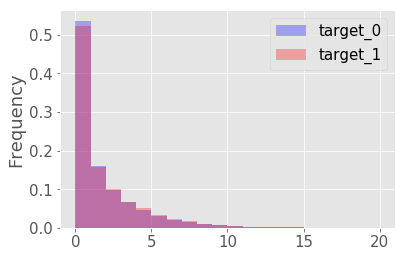

In [24]:
data["OBS_30_CNT_SOCIAL_CIRCLE"][data["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 
                                                              ,color="b" ,normed=True, range=(0,20),label="target_0")
data["OBS_30_CNT_SOCIAL_CIRCLE"][data["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, 
                                                              color="r",normed=True, range=(0,20),label="target_1")
plt.legend()

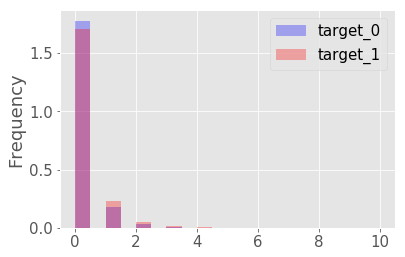

In [27]:
data["DEF_30_CNT_SOCIAL_CIRCLE"][data["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 
                                                              ,color="b" ,normed=True,range=(0,10),label="target_0")
data["DEF_30_CNT_SOCIAL_CIRCLE"][data["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, 
                                                              color="r",normed=True,range=(0,10),label="target_1")
plt.legend()

正規化しているが、ユーザーのacitivate回数の分布に大差がないので、ターゲットラベルが1の人（返済能力が怪しい人）は
ローン（貸し出し）回数が多くなる（もしくは、ローン回数が多くなり結果的に返済できなくなる）という仮説は間違っている。
  
仮説が間違っている以外に考えられるのは、自分がこのカラムの意味を履き違えていること。その可能性を踏まえて、このカラム（DEF_30_CNT_SOCIAL_CIRCLE）と相関の高いカラムを確認し、その特徴量をEDAする。
　　
もし相関の高い特徴量に関しても同様な傾向が見られなければ、そもそも

In [16]:
data.corr()["DEF_30_CNT_SOCIAL_CIRCLE"].sort_values(ascending =False)

DEF_30_CNT_SOCIAL_CIRCLE       1.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.860517
OBS_60_CNT_SOCIAL_CIRCLE       0.331571
OBS_30_CNT_SOCIAL_CIRCLE       0.329338
TARGET                         0.032248
AMT_REQ_CREDIT_BUREAU_YEAR     0.018590
DAYS_EMPLOYED                  0.016717
REGION_RATING_CLIENT           0.015394
REGION_RATING_CLIENT_W_CITY    0.013935
FLAG_DOCUMENT_3                0.012654
OWN_CAR_AGE                    0.008868
FLAG_DOCUMENT_6                0.007707
REG_CITY_NOT_LIVE_CITY         0.007167
REGION_POPULATION_RELATIVE     0.006329
NONLIVINGAPARTMENTS_MODE       0.005434
FLAG_CONT_MOBILE               0.004814
NONLIVINGAPARTMENTS_MEDI       0.004370
NONLIVINGAPARTMENTS_AVG        0.003857
DAYS_REGISTRATION              0.003361
DAYS_ID_PUBLISH                0.002738
FLAG_DOCUMENT_2                0.002395
FLAG_MOBIL                     0.000580
REG_CITY_NOT_WORK_CITY         0.000493
DAYS_LAST_PHONE_CHANGE         0.000423
AMT_REQ_CREDIT_BUREAU_MON      0.000331


top4と目的変数を除けば、AMT_REQ_CREDIT_BUREAU_YEAR (一年間にクレジットビューローを何回利用しているか
                                         http://casyingfinance1.seesaa.net/article/62578746.html)
が最も相関が高いので、その特徴量を深掘りしていく。

年間クレジットビューロ利用回数の統計量をターゲットラベルごとに算出する。

In [28]:
data["AMT_REQ_CREDIT_BUREAU_YEAR"][data["TARGET"]==0].describe()

count    245459.000000
mean          1.889199
std           1.863376
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [29]:
data["AMT_REQ_CREDIT_BUREAU_YEAR"][data["TARGET"]==1].describe()

count    20533.000000
mean         2.028783
std          1.934063
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         22.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

先ほど同様、ターゲットラベルごとに傾向が異なるかヒストグラムでも確認する

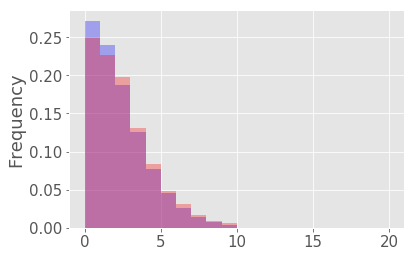

In [19]:
data["AMT_REQ_CREDIT_BUREAU_YEAR"][data["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 
                                                              ,color="b" ,normed=True,range=(0,20))
data["AMT_REQ_CREDIT_BUREAU_YEAR"][data["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, 
                                                              color="r",normed=True,range=(0,20))

ラベルごとで分布が変わることはない。これは年間クレジットビューロ使用回数がターゲットラベルを特徴づけているとは言えないことを意味している。

## 仮説3
ローン返済額が多い人は家計が圧迫され返済が滞ると考えられる。  

この仮説を検証するため、ローン返済額の総計（AMT_ANNUITY）をターゲットラベルごとにバイオリンプロットで分布を確認する。

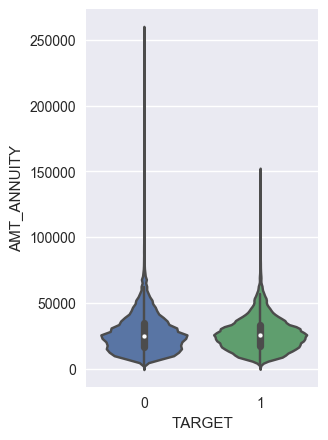

In [20]:
import seaborn as sns

size=(3,5)
plt.figure(figsize=size,dpi=100)
sns.violinplot("TARGET","AMT_ANNUITY" , data = data)

上の図から仮説は間違っていたことが確認できる。ラベルごとでローン返済額の分布は変わらず。  
得られた知見として、ターゲットラベル「0」の人の方がローン返済額の最大値が多く、ローン額150000ドル以上はターゲットラベル「１」の中にはいない。(仮説をしっかり立てないと、このように集計しても得られる示唆が少ない) 

## 仮説4
ローン返済額とローン返済額の総計には相関がある。月々の支払いが高額な人は借りている合計金額も高額であるかもしれない。

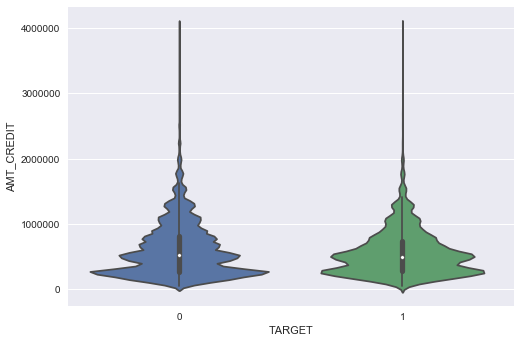

In [21]:
sns.violinplot("TARGET","AMT_CREDIT" , data = data)

分布を確認する限り、仮説4は間違っていそうだが、相関がないとは限らないので"AMT_ANNUITY" と"AMT_CREDIT"の相関の有無を
確認する。

In [22]:
data[["AMT_ANNUITY","AMT_CREDIT"]].corr()

,AMT_ANNUITY,AMT_CREDIT
AMT_ANNUITY,1.000000,0.770138
AMT_CREDIT,0.770138,1.000000


全データに対して算出した相関係数は0.77である。散布図でも確認してみる。

Text(0,0.5,'AMT_ANNUITY')

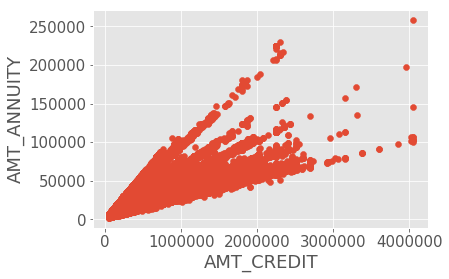

In [31]:
plt.scatter(data["AMT_CREDIT"], data["AMT_ANNUITY"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')

上の散布図から、ある金額（AMT_CREDIT）を借りている場合にそれに対応する月額返済額(AMT_ANNUITY)の
上限と下限が決まっていることが確認できる。　

その制約条件範囲外ではデータは存在しないことになり、現状の2次元空間で相関係数を算出することは厳密ではない。
要するに、**上で算出した相関係数0.77という値から相関の有無を判断することはできない**と考える。

もし相関係数を確認するなら、AMT_CREDITとAMT_ANNUITYを座標変換を施し、2次元空間上に擬似的にマッピングしてから算出する必要がある。

****

データ分析においては、これまでのように特徴量と目的変数の関係を確認するだけでなく、データの外れ値や欠損値の有無について確認する必要がある。

## 外れ値の確認
外れ値が混在している場合、機械学習モデルの学習を安定させるために標準化やミニマックススケーラーなどのデータ正規化を実施する必要がある。データの前処理工程に大きく影響するので、外れ値の確認は必ずする（手法によりけり）。
　　
  
ここでは一例として、データ分析において外れ値がよく混在している年齢についてみていく。  
※ユーザーの利用ログなどのデータの場合、ユーザーの誤入力や多くのユーザーが適当に入力するため。

本データには年齢という特徴量は存在しないので、自分で「DAYS_BIRTH」特徴量を変換する必要がある。

In [35]:
data["age"] = abs(data["DAYS_BIRTH"]/365).round().astype(int)

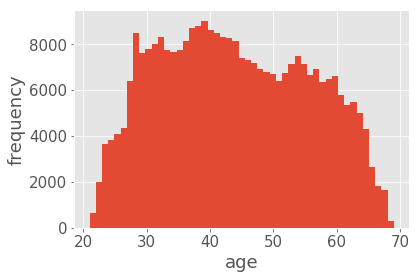

In [37]:
data["age"].hist(bins = data["age"].nunique())
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

年齢の分布、最小値、最大値から、年齢における外れ値は存在しない。

※binの数をデータのユニーク数と同じにしたい場合、上記のようにnunique()を用いると良い。

次に登録年数について、外れ値の有無を確認する。しかしage同様、登録年数という特徴量は存在しないので、DAYS_REGISTRATIONという特徴量を下記のように変換する必要がある。

In [41]:
data["regist_year"]= abs(data["DAYS_REGISTRATION"]/365).round().astype(int)

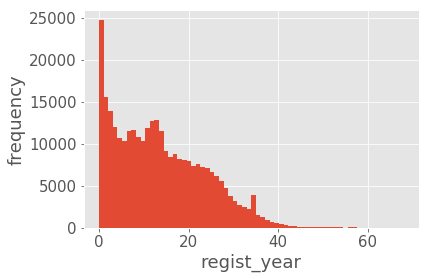

In [42]:
data["regist_year"].hist(bins=data["regist_year"].nunique())
plt.xlabel("regist_year")
plt.ylabel("frequency")
plt.show()

In [30]:
len(data[data["regist_year"]==60])

2

loan（貸し出し）の登録してから60年経過しているユーザーが2人いる。公式サイトの情報ではHome Credit社は1997年設立と記載されており、
20年以上のデータは全て異常データとなるが、データの分布からこれほど多くのデータが異常データと考え難い。
おそらく、"DAYS_REGISTRATION"カラムは、home credit社のローン登録日ではなく、すでに他社のローンを組んでおり、
home credit社のローンへ切り替えたユーザーのデータなどが入り混じっていると考えられる（仮説）。  

しかし、いくらローンの開始日と言っても、68年前（1950年）から開始しているローンがあるので、
大昔に登録されたデータに対しては削除するなどの措置を取ることも考えられる。

In [31]:
data["regist_year"].max()

68

****

## 欠損値の確認

データの中にNanがどれだけ含まれているか確認する。集計していても、そもそもデータとして必要がないデータが含まれている場合、欠損値を削除してから基礎集計に入る。しかし、欠損値データの削除の可否判断するために、最初に集計を行うので、鶏の卵の話である。基本的に、基礎集計、欠損値、外れ値処理は一方向プロセスではなく、巡回する処理だと思っておけば良い。  

ここでは、一例を紹介するに留める。
  
例：全ユーザーのうち、50%以上が欠損であるカラムをカウントする。

In [33]:
missing_data = pd.DataFrame(data.isnull().sum()/len(data))
missing_50 = missing_data[missing_data.iloc[:,0]>=0.5]
missing_50.shape

(41, 1)

※41個の特徴量が50%以上nanである。これらの41個の特徴量を削除すべきかを考えるために、一つずつ精査する必要がある。
  
実際にこのようなデータに直面した時はそもそもなぜNaNになっているか、そしてそれを踏まえた上で、
除去するしないを考える。注意点としては**Nanだからといって必ずしも除去するとは限らない**ことである。  

例えば、ユーザーが手打ちで適当に入力するデータの場合（記入が必須でない記入欄のデータは当然Nanになる）、
それを除外し集計、モデリングを実施してしまうと、実際の想定ユーザー（テストデータで手に入るデータ群）と異なるデータ群でモデリングすることになる。
そういった場合を考え、NanをNanのまま扱えるモデルを選定したり、Nanには別のラベルを付与するなどする。